# Ансамблирование моделей

## Смещение и разброс (bias-variance decomposition)

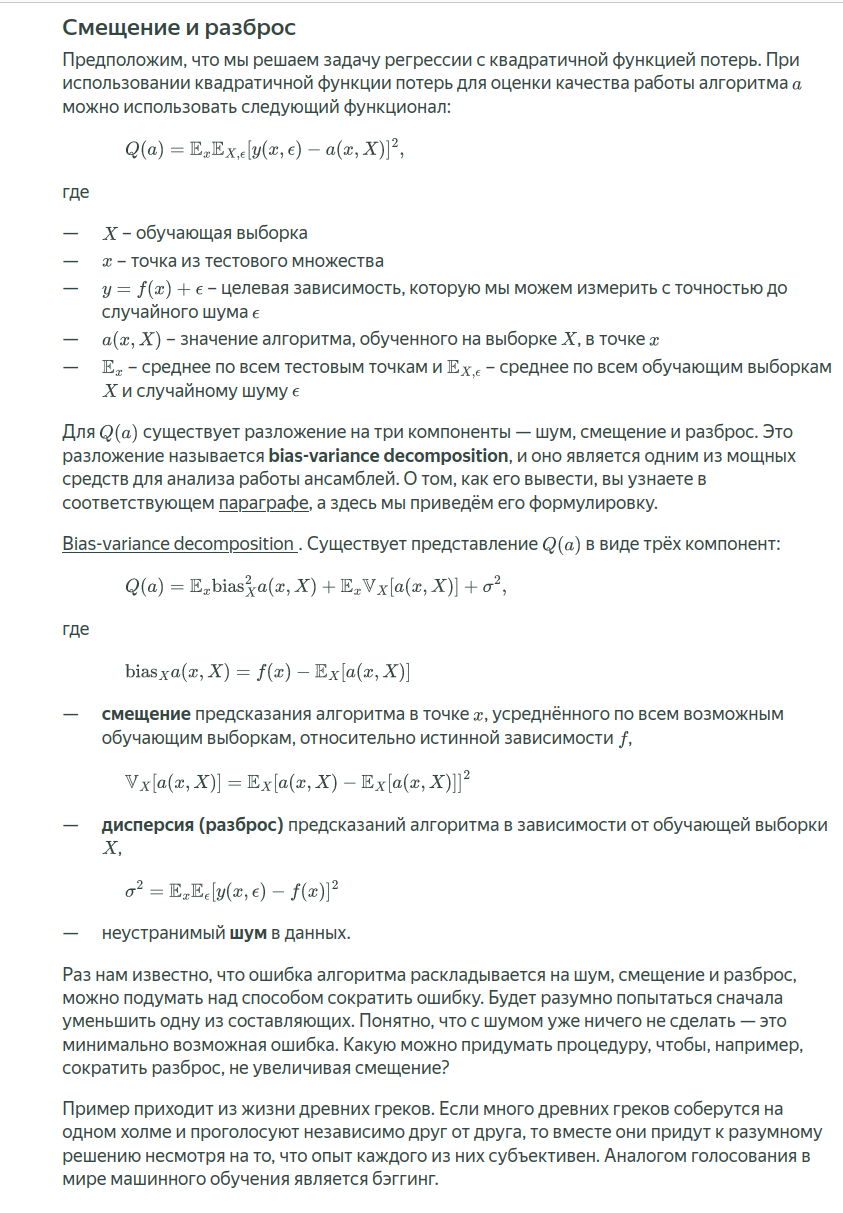

## Bagging (bootstrap aggregation)

Пусть имеем обучающую выборку $X = (x_i,y_i)_{i=1}^{\ell}$

Реализуем bootstrap метод, т.е. выбор подвыборки из $X$ с возвращением

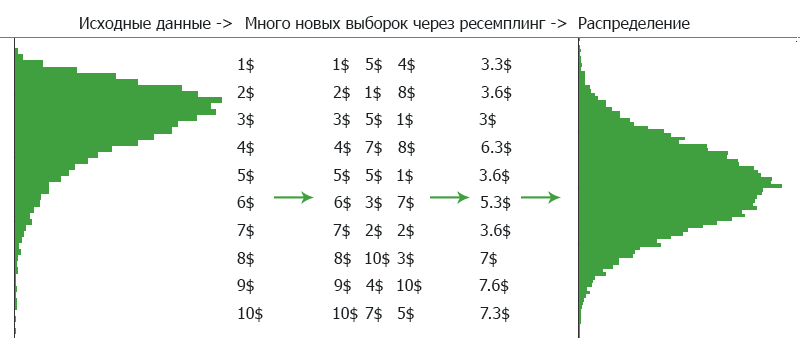


После применения метода получим N наборов подвыборок $X_1, X_2, X_3 ... , X_N$ - подвыборки

Обучим на каждой из подвыборок модели $b_1(x,X_1),b_2(x,X_2),....b_N(x, X_N)$ - базовые модели

Тогда можем ансамблировать данные базовые модели в **модель ансамбля** следующим способом :

$$a(x) = \dfrac{1}{N}(b_1(x) + b_2(x) + .. b_N(x))$$

Плюсы:

1. Смещение композиции равно смещению одного базового алгоритма
2. В случае если базовые алгоритмы некоррелированы, то дисперсия композиций в k раз меньше дисперсии отдельного алгоритма (на практике такое маловероятно)

### Доказательства

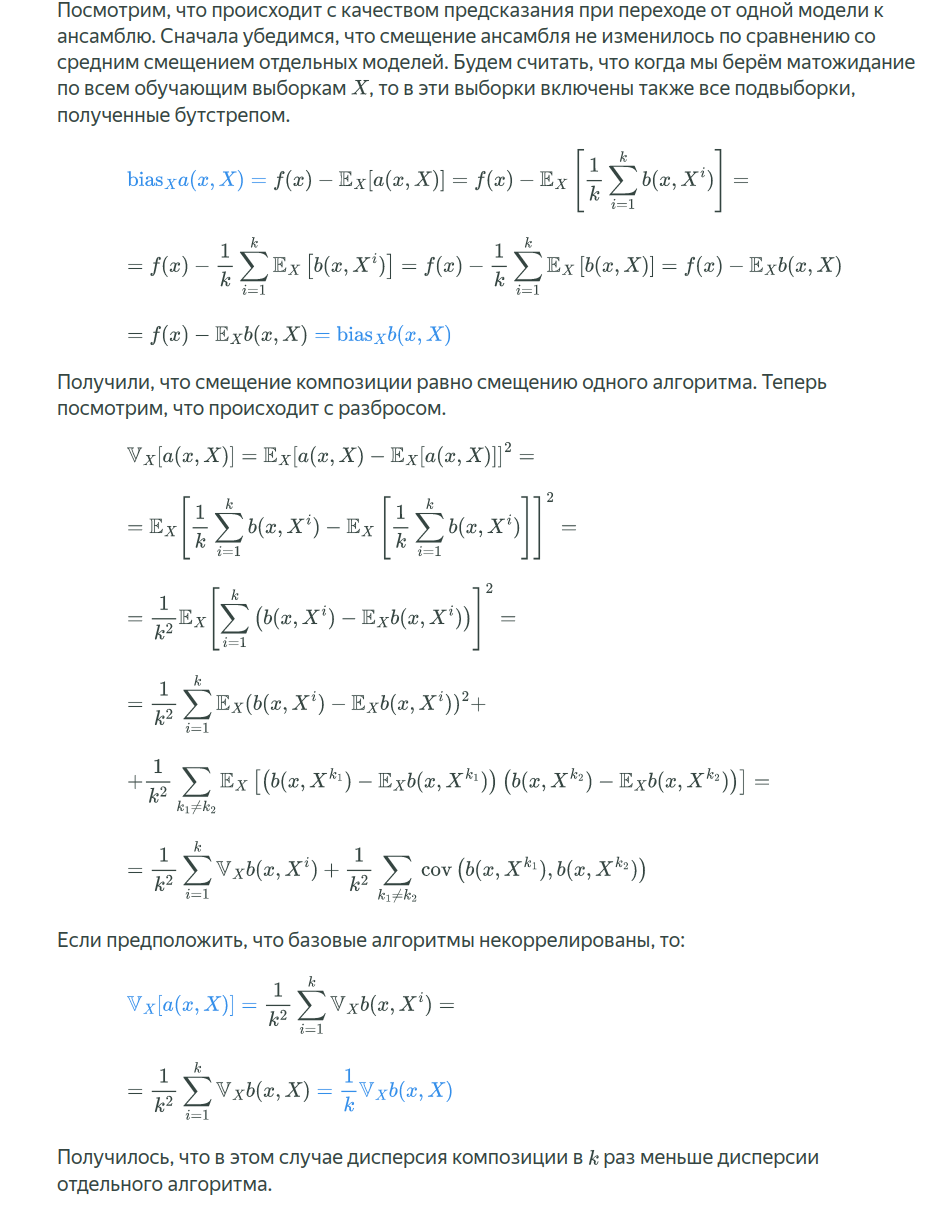

### Пример на деревьях

$f(x) = x sin(x) + \epsilon$, $\epsilon = N(0,9)$

1. Деревья глубиной 7, 100 деревьев на различных семплах размера 20
2. Bagging 10 решающий деревьев глубина 7. 100 ансамблей на разлиных семплах размера 20

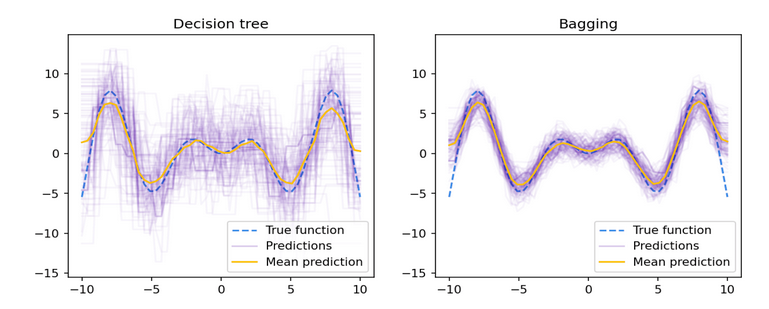

Результат:
1. дисперсия у ансамбля ниже
2. средние предсказания не отличаются

Источник: [yandex_handbook](https://github.com/yandexdataschool/ML-Handbook-materials/blob/main/chapters/ensembles/bias_variance.ipynb)

## Random Forest

Если базовые алгоритмы некоррелированы, то диспперсия композиций в k раз меньше. На практике:

*. такое маловероятно т.к. базовые модели учат все равно одну и ту же зависимости на пересекающихся сэмплах
*. для уменьшения дисперсии достаточно чтобы базовые модели были в некоторой степени непохожи.

Алгоритм построения случайного леса:

1. Создаем подвыборку $X_i$ методом bootstrap из обучающей выборки $X$
2. Методом случайных подпространтсв выбираем в каждой вершине дерева некоторый набор признаков n<N из которых будем строить предикат, находя оптимальный сплит.
3. Предсказанием ансамбля является среднее по предиктам базового алгоритма, или метод голосования при классификации.


<div>
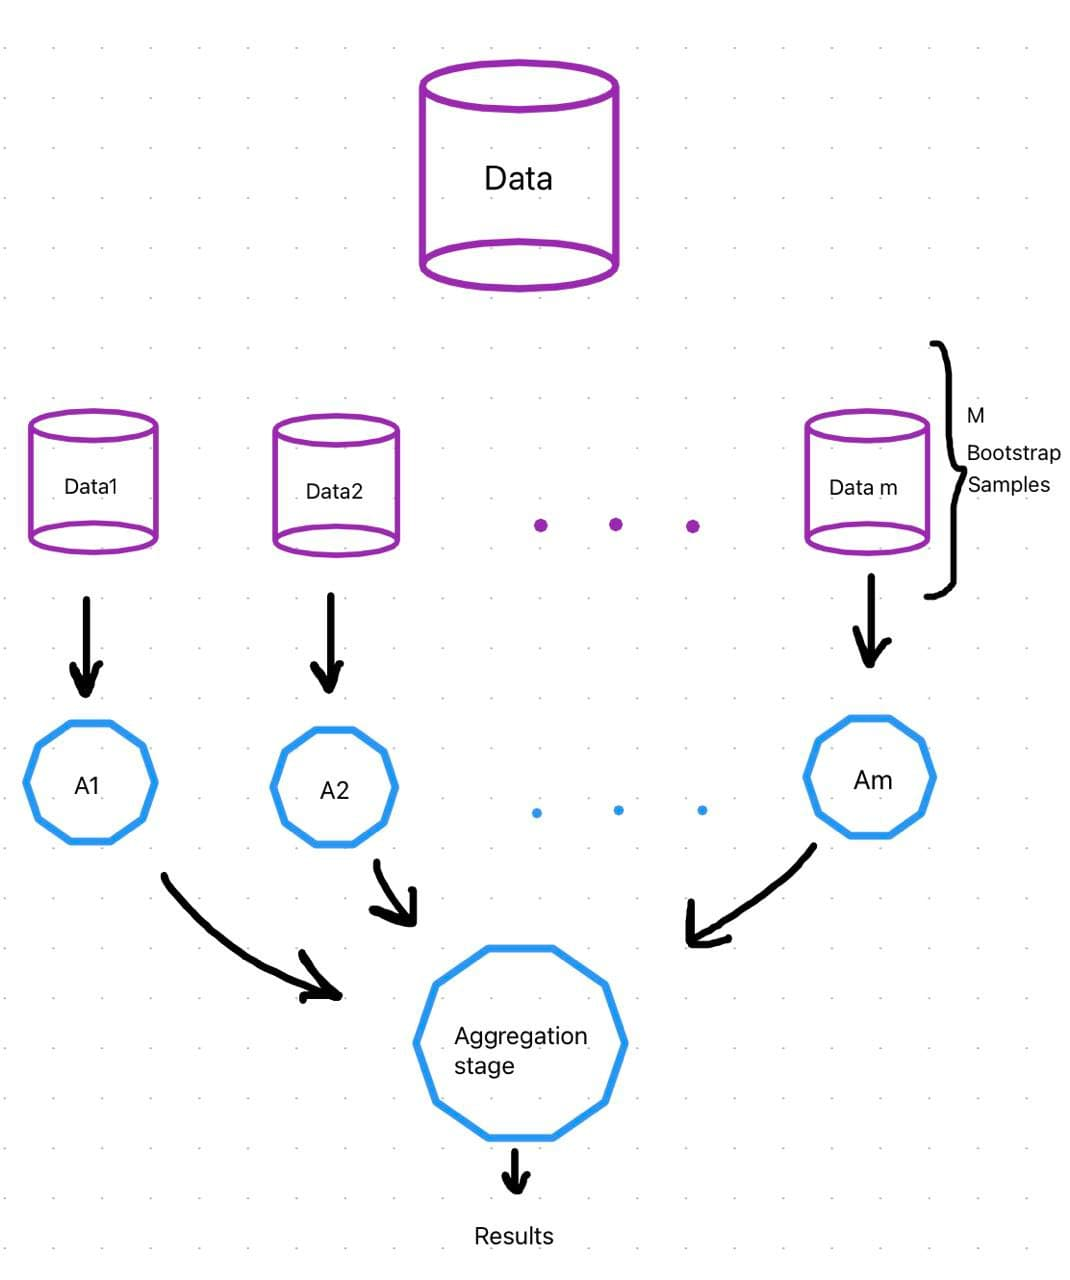
</div>


Замечание:

1. Глубина деревьев - разброс уменьшает bagging, смещение уменьшается самой структурой базовых моделей. Низкие деревья - верхнеуровневое запоминание (низкая дисперсия, высокое смещение). Глубокие деревья - глубокое запоминание (высокая дисперсия, низкое смещение) $\rightarrow$  используем глубокие деревья т.к. bagging уменьшит разрбос.
2. Разбиение подпространств признаков для каждого дерева - снижает корреляцию между деревьями - уменьшаем количество признаков для уменьшение корреляции  ( на практике $\sqrt{(d)}$ - классификация , $\dfrac{1}{3}d$ - регрессия)
3. Количество деревьев в случайном лесе выбирается методом локтя

## Stacking

Отличия stacking:
* Может использовать в качестве базовых моделей модели из разных семейств
* Агрегирующая стадия реализована при помощи мета-модели

Алгоритм:
1. Используя k-fold кроссвалидацию разбиваем $X$ 
2. Обучаем базовые модели на (k-1) фолдах и предсказываем мета-факторы
3. Обучаем мета-модель для предсказания исходного таргета, используя мета-факторы и исходные признаки (если это необходимо)

**Blending** - использование train\valid\test разбиения и применение подхода как stacking

Минусы:
1. Нет прямой интерпретации уменьшения разброса и смещения

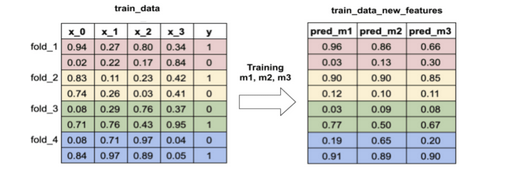

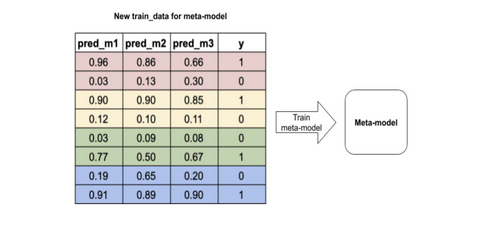

## Boosting

Общий класс методов ансамблирования подразумевающий уменьшение ошибки каждой последующей базовой моделью ошибки ансамбля из предыдущих базовых моделей.
При этом за базовые модели выбираются модели с высоким смещением и небольшим разбросом т.к. быстрее учатся а смещение уменьшится бустингом.

Плюсы:
1. Композиция имеет меньшее смещение чем каждая отдельная базовая модель

На текущий момент под boosting-ансамблированием чаще всего имеют в виду Gradient Boosting.


Пусть решим задачу регресии с $L(x,y) = \dfrac{1}{N} \sum^{N}_{i=1} (y_i - a(x_i))^2 \rightarrow min$ 

Используем композицию их k базовых алгоритмов, $a(x) = b_1(x) + b_2(x) + b_3(x) ... + b_k(x)$

В качестве базовых алгоритмов допустим выберем деревья решений.

Построив первый базовый алгоритм $b_1(x)$  посчитаем для него ошибку $s_i^1 = y_i - b_1(x_i)$

$a_2(x_i) = b_1(x_i) + b_2(x_i) = b_1(x_i) + s^1_i = b_1(x_i) + (y_i - b_1(x_i)) = y_i$

$b_2(x) = argmin_{b\in \beta} L(s^1,b(x))$

$s^{k-1}_i = y_i - \sum^{k-1}_{i=1} b_{k-1}(x_i) = y_i -a_{k-1}(x_i)$

$b_k(x) =argmin()_{b\in \beta } L(s^{k-1}, b(x))$

$a_k(x) = a_{k-1}(x) + b_k(x)$

При этом каждый последующий после первого базовый алгоритм на минимизацию ошибку предыдущих. Т.е. если первый базовый алгоритм ошибся на $x_l$ элементе на 10 больше, то второй базовый алгоритм должен предсказать -10.

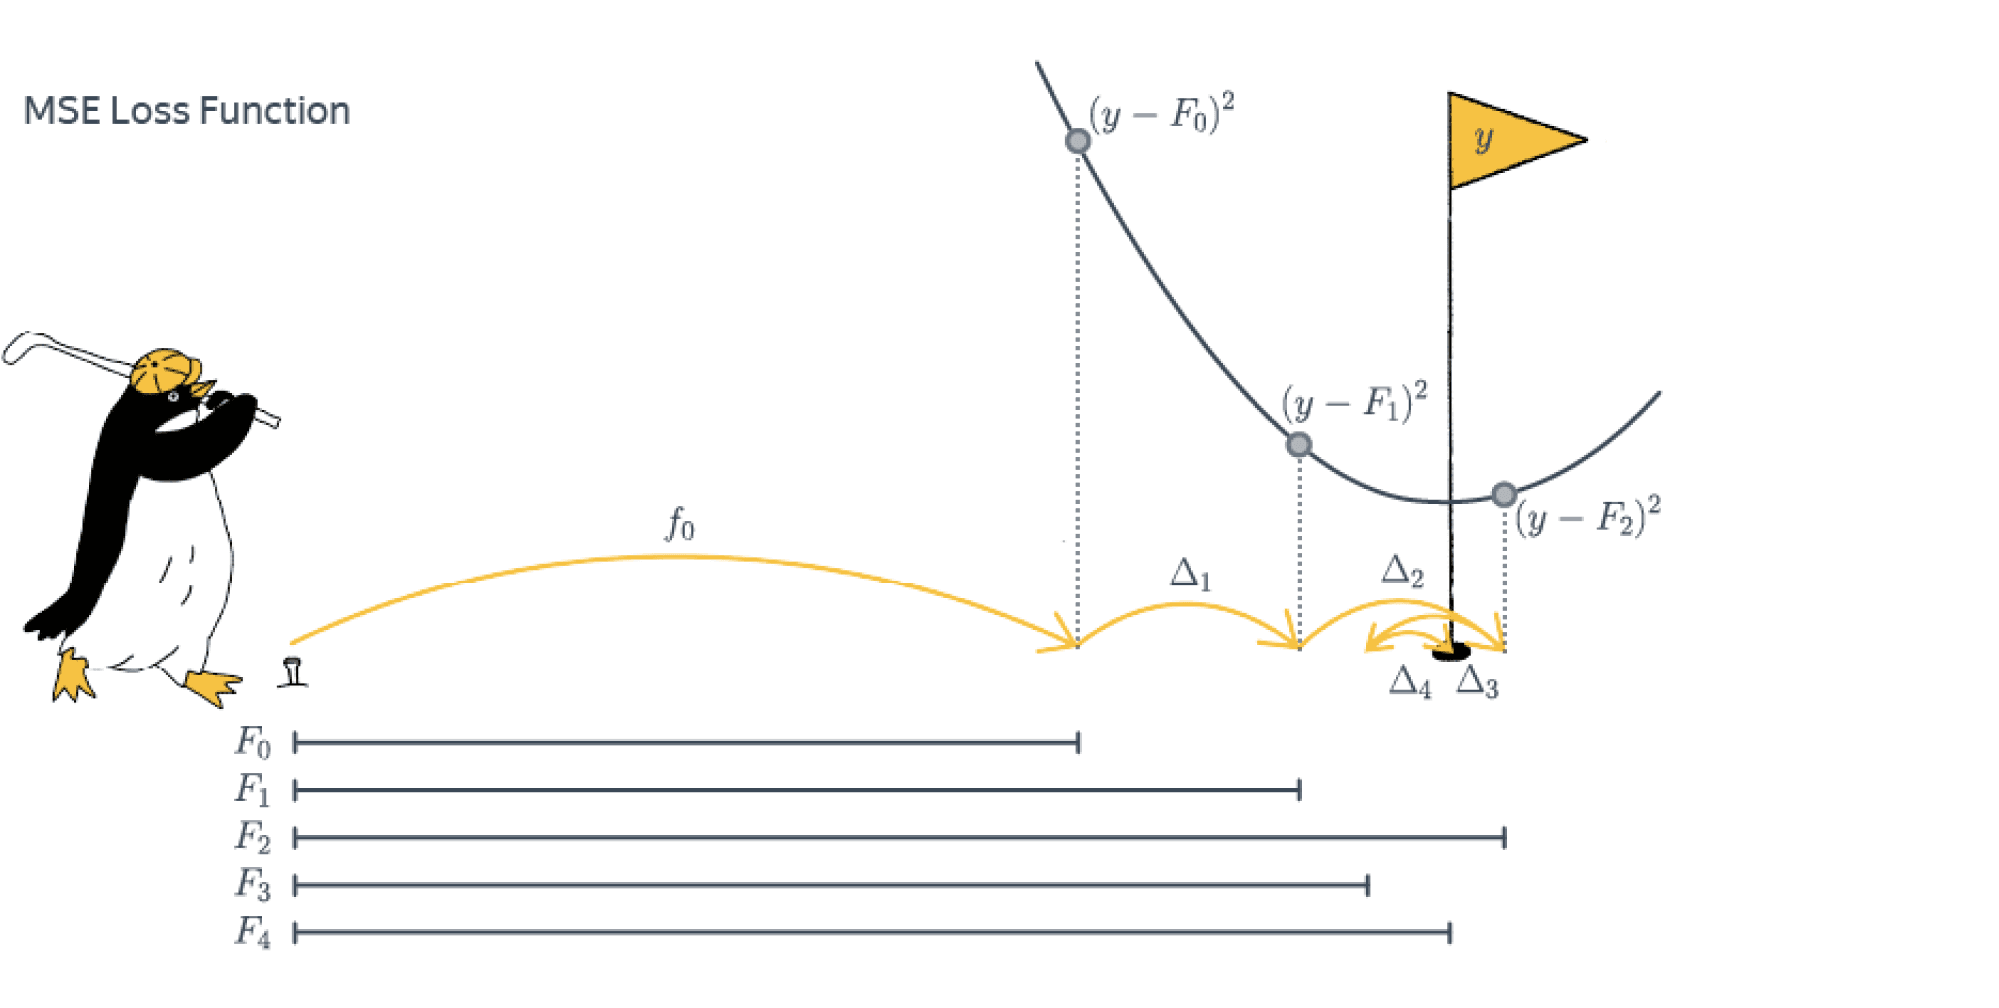